<a href="https://colab.research.google.com/github/thuyd12/Customers-and-orders-clustering/blob/main/33_Customers_and_orders_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 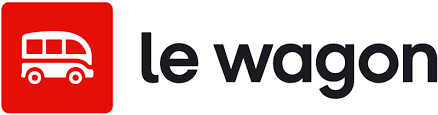

# Customers and orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to :
Create order and customer clusters.

## Orders clustering

a) Execute cell below to load data into `df` variable.

It will select 50k orders randomly.

In [ ]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00           0.00         164.17   
1              0.00            44.99           0.00           0.00   
2             34.01             0.00           0.00           5.88   
3             16.26             0.00          32.28          26.72   
4              9.11             4.53         206.86          18.68   

   turnover_fresh  promo_rate  
0             0.0    0.222340  
1             0.0    0.047844  
2             0.0         NaN  
3             0.0    0.107228  
4             0.0    0.006650

In [ ]:
# Clusters

# fresh + groecery
# grocery + baby + home
# 

b) Which features do you see? Is the any null value?

<AxesSubplot:>

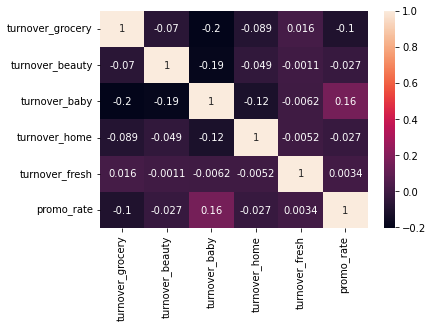

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

Only column promo_rate contains null.

c) Replace null values if any by 0 using `fillna()` method of pandas.

In [ ]:
df = df.fillna(0)

d) In a `df_orders` variable, keep all turnover columns of df. These features will help us to cluster orders. 

In [ ]:
df_orders = df.drop(columns=["promo_rate"])

e) Use plotly.express and a box chart to see if turnover distribution is different per category.

In [ ]:
import plotly.express as px

px.box(df_orders)

Turnover distribution is clearly different. Quantiles are not equal, neither median. Turnover fresh is almost empty.

f) Very few orders include fresh product.
Delete turnover_fresh column from `df_products`.

In [ ]:
df_orders = df_orders.drop(columns=["turnover_fresh"])
df_orders

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0                  0.00             0.00           0.00         164.17
1                  0.00            44.99           0.00           0.00
2                 34.01             0.00           0.00           5.88
3                 16.26             0.00          32.28          26.72
4                  9.11             4.53         206.86          18.68
...                 ...              ...            ...            ...
49995              0.00            15.88           0.00           0.00
49996              0.00            32.06           0.00           0.00
49997              0.00             0.00         155.47           0.00
49998             41.80             0.00           0.00           0.00
49999             72.29             0.00           0.00           0.00

[50000 rows x 4 columns]

g) Train a first kmeans algorithm with two a-priori clusters.


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(df_orders)

df_orders['k_means_pred'] = km.labels_
df_orders.head(3)

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00            0.0         164.17   
1              0.00            44.99            0.0           0.00   
2             34.01             0.00            0.0           5.88   

   k_means_pred  
0             2  
1             2  
2             2

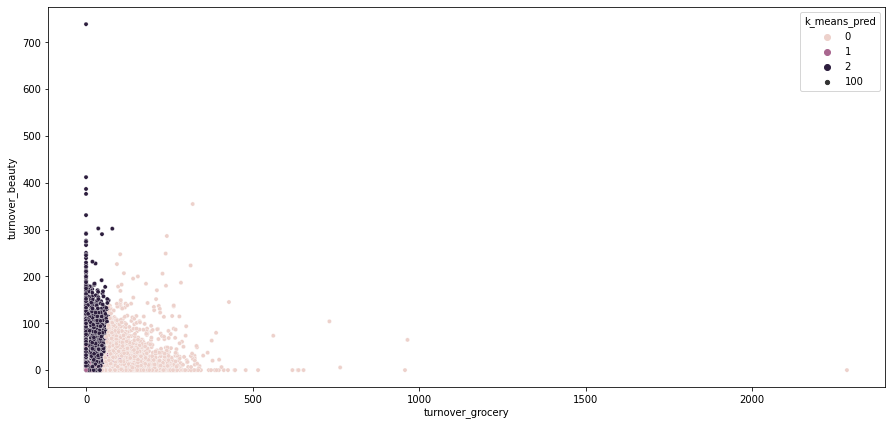

In [ ]:
# Objhective -> Scatterplot like iris_dataset

# x-axis -> df_orders['turnover_grocery']
# y-axis -> df_orders['turnover_baby']
# color -> k-means_pred
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.scatterplot(data = df_orders,
                x = 'turnover_grocery',
                y = 'turnover_beauty',
                hue = 'k_means_pred',
                size=100)
plt.show()

h) What is inertia for a clustering algorithm? What is inertia for this model?

In [ ]:
df_orders

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0                  0.00             0.00           0.00         164.17
1                  0.00            44.99           0.00           0.00
2                 34.01             0.00           0.00           5.88
3                 16.26             0.00          32.28          26.72
4                  9.11             4.53         206.86          18.68
...                 ...              ...            ...            ...
49995              0.00            15.88           0.00           0.00
49996              0.00            32.06           0.00           0.00
49997              0.00             0.00         155.47           0.00
49998             41.80             0.00           0.00           0.00
49999             72.29             0.00           0.00           0.00

[50000 rows x 4 columns]

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00            0.0         164.17   
1              0.00            44.99            0.0           0.00   
2             34.01             0.00            0.0           5.88   

   k_means_pred  
0             1  
1             1  
2             1

i) How do we know if 2 clusters a priori was a good choice or not? 
Which method could you use?

Elbow method could be used here to select the good number of clusters.

j) You will use elbow method. 

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [ ]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:

    # train Kmeans algorithm
    km = KMeans(n_clusters=k).fit(df_orders)
    # store inertia
    inertias.append(km.inertia_)

In [ ]:
inertias

[242594169.44355044,
 181436212.37312782,
 130436947.66729552,
 114314722.51756564,
 98835617.2151762,
 84577817.34855112,
 73605315.08913863,
 65263485.73159742,
 59633095.531991765]

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

In [ ]:
fig = px.line(y=inertias,
              x=range(1, 10),
              labels={'x': 'nb centroids', 'y':'Inertia'},
              title="Elbow method")
fig.show()

<details>
    <summary><i>Solution</i></summary>

Elbow method shows that 3 is the number of clusters to use because it forms like an elbow.
</details>

l) Train a new model with 3 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [ ]:
km = KMeans(n_clusters=3, n_init=100)
labels = km.fit_predict(df_orders)

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

In [ ]:
import seaborn as sns 

sns.countplot(x=labels)

One bigger cluster but overall, orders are well distributed.

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluser_centers_` attribute on your KMeans object. 

Create a DataFrame with each cluster's centroid values and the right column names for each turnover feature. 

In [ ]:
pd.DataFrame(km.cluster_centers_, columns=df_orders.columns)

o) What conclusions can you draw? What are the different order profiles that emerge?

<details>
    <summary><i>Solution</i></summary>

3 types of orders : 1 with mostly groceries, 1 with baby products and 1 with a lower amount, mainly mixing beauty and home products. 
</details>

p) Add to `df` a new column label containing labels of each sample.

In [ ]:
df["label"] = labels

q) What does this instruction do? What can you say?

In [ ]:
df[df["promo_rate"]>0].groupby("label").size()/df.groupby("label").size()

Grocery cluster uses more promotion codes than the other clusters.

# Customers clustering



a) Execute cell below to load customer data into `df_customers` variable.

In [ ]:
query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh
FROM `data-analytics-bootcamp-363212.course33.gwz_customers_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df_customers = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df_customers = df_customers.drop(columns=["turnover_fresh"])
df_customers.head()

b) Use elbow method to see if a number of cluster a priori exists or not for this dataset.

Plot results in a chart. What can you say?

In [ ]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:

    # train Kmeans algorithm
    km = KMeans(n_clusters=k).fit(df_customers)
    # store inertia
    inertias.append(km.inertia_)

In [ ]:
fig = px.line(y=inertias, x=range(1, 10), labels={'x': 'nb centroids', 'y':'Inertia'}, title="Elbow method")
fig.show()

<details>
    <summary><i>Solution</i></summary>

There is no obvious choice. No distinct clusters seem exist.
</details>

c) From orders and customers clustering, what can you conclude?

<details>
    <summary><i>Solution</i></summary>

We have seen that there was 3 clusters for orders. 
One for grocery purchase, one for baby purchase and diversify one.

But there is no obvious customers cluster. It means that when a customer buy somthing on greenweez, it's for a specific need. But a same customer can one day come to buy one category and another days for a different one. 
Customers don"t seem to buy specific categories only.

</details>